데이터 분석 <hr>

In [29]:
import pandas as pd
import numpy as np
import koreanize_matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [30]:
base_path = '../MINI5/data'   # 기본 경로
all_data = []

for month in range(1, 12):  # 1~11월
    folder_name = f"melon_2025_{month:02d}month"
    
    for week in range(1, 6):  # week_1 ~ week_5
        file_path = f"{base_path}/{folder_name}/week_{week}.csv"
        
        try:
            df = pd.read_csv(file_path, encoding='utf-8-sig')
            df['월'] = month
            df['주차'] = week
            all_data.append(df)
            print("✅ 불러옴:", file_path)
        except FileNotFoundError:
            print("❌ 없음:", file_path)
            continue

result_df = pd.concat(all_data, ignore_index=True)

# 합친 데이터 저장 경로 및 파일명 지정
save_path = '../MINI5/data/멜론_2025.csv'
result_df.to_csv(save_path, index=False, encoding='utf-8-sig')

✅ 불러옴: ../MINI5/data/melon_2025_01month/week_1.csv
✅ 불러옴: ../MINI5/data/melon_2025_01month/week_2.csv
✅ 불러옴: ../MINI5/data/melon_2025_01month/week_3.csv
✅ 불러옴: ../MINI5/data/melon_2025_01month/week_4.csv
✅ 불러옴: ../MINI5/data/melon_2025_01month/week_5.csv
✅ 불러옴: ../MINI5/data/melon_2025_02month/week_1.csv
✅ 불러옴: ../MINI5/data/melon_2025_02month/week_2.csv
✅ 불러옴: ../MINI5/data/melon_2025_02month/week_3.csv
✅ 불러옴: ../MINI5/data/melon_2025_02month/week_4.csv
❌ 없음: ../MINI5/data/melon_2025_02month/week_5.csv
✅ 불러옴: ../MINI5/data/melon_2025_03month/week_1.csv
✅ 불러옴: ../MINI5/data/melon_2025_03month/week_2.csv
✅ 불러옴: ../MINI5/data/melon_2025_03month/week_3.csv
✅ 불러옴: ../MINI5/data/melon_2025_03month/week_4.csv
❌ 없음: ../MINI5/data/melon_2025_03month/week_5.csv
✅ 불러옴: ../MINI5/data/melon_2025_04month/week_1.csv
✅ 불러옴: ../MINI5/data/melon_2025_04month/week_2.csv
✅ 불러옴: ../MINI5/data/melon_2025_04month/week_3.csv
✅ 불러옴: ../MINI5/data/melon_2025_04month/week_4.csv
❌ 없음: ../MINI5/data/melon_2025_04

데이터 전처리 <hr>

In [31]:
# 데이터 전처리
result_df = result_df.loc[:, ~result_df.columns.str.contains('^Unnamed')]
company_df = pd.read_csv('../MINI5/data/소속사_규모.csv', encoding='utf-8-sig')

# result_df = result_df[result_df['소속사'] != '정보없음']
# result_df = result_df[result_df['가수유형'] != '정보없음']

if '기업 규모' not in result_df.columns:
    result_df = result_df.merge(company_df, on='소속사', how='left')

# 결측치 확인
total_missing = result_df.isnull().sum().sum()
print(f"\n전체 결측치 개수: {total_missing}개")
display(result_df.head())


전체 결측치 개수: 593개


,순위,노래제목,그룹이름,가수유형,소속사,월,주차,기업 규모
0,1,"HOME SWEET HOME (feat. 태양, 대성)",G-DRAGON,솔로,갤럭시코퍼레이션,1,1,중소기업
1,2,APT.,로제 (ROSÉ),솔로,THE BLACK LABEL,1,1,중견기업
2,3,Whiplash,aespa,그룹,(주)SM엔터테인먼트,1,1,대기업
3,4,나는 반딧불,황가람,솔로,JMG (더블엑스엔터테인먼트),1,1,중소기업
4,5,toxic till the end,로제 (ROSÉ),솔로,THE BLACK LABEL,1,1,중견기업


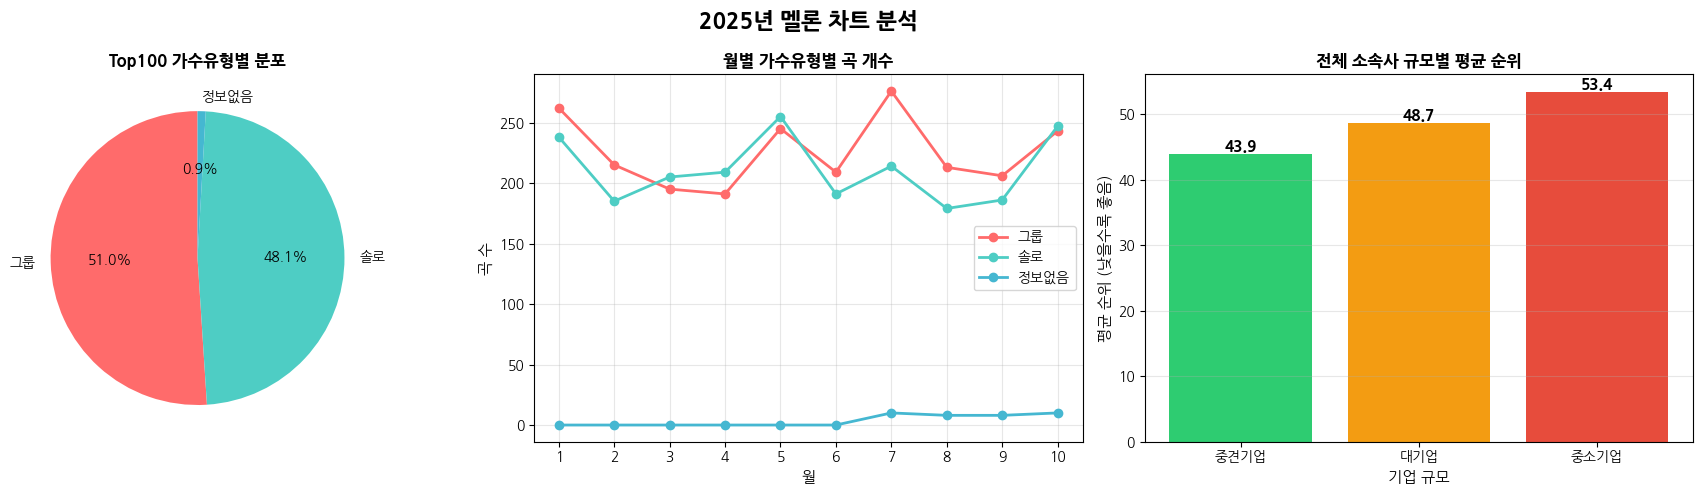

In [32]:
# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('2025년 멜론 차트 분석', fontsize=16, fontweight='bold')

# 1번 그래프: Top100 가수유형 분포
top100_df = result_df[result_df['순위'] <= 100]
artist_type_dist = top100_df['가수유형'].value_counts()
axes[0].pie(artist_type_dist.values, labels=artist_type_dist.index, autopct='%1.1f%%', 
            colors=['#FF6B6B', '#4ECDC4', '#45B7D1'], startangle=90)
axes[0].set_title('Top100 가수유형별 분포', fontsize=12, fontweight='bold')

# 2번 그래프: 월별 가수유형별 곡 개수 
monthly_artist_type = result_df[result_df['월'] <= 10].groupby(['월', '가수유형']).size().unstack(fill_value=0)
for i, col in enumerate(monthly_artist_type.columns):
    axes[1].plot(monthly_artist_type.index, monthly_artist_type[col], marker='o', 
                label=col, linewidth=2, color=['#FF6B6B', '#4ECDC4', '#45B7D1'][i])
axes[1].set_xlabel('월', fontsize=11)
axes[1].set_ylabel('곡 수', fontsize=11)
axes[1].set_title('월별 가수유형별 곡 개수', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(range(1, 11))

# 3번 그래프: 전체 기업규모별 평균순위
scale_rank_total = result_df.groupby('기업 규모')['순위'].mean().sort_values(ascending=True)
bars = axes[2].bar(scale_rank_total.index, scale_rank_total.values, color=['#2ECC71', '#F39C12', '#E74C3C'])

for bar in bars:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

axes[2].set_xlabel('기업 규모', fontsize=11)
axes[2].set_ylabel('평균 순위 (낮을수록 좋음)', fontsize=11)
axes[2].set_title('전체 소속사 규모별 평균 순위', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()